# 보스턴집값데이터 회귀분석 (라쏘, 릿지, 엘라스틱넷)

In [1]:
# !pip install koreanize-matplotlib

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

In [3]:
data = pd.read_csv("https://raw.githubusercontent.com/haram4th/ADsP/main/01%EB%B3%B4%EC%8A%A4%ED%84%B4%EC%A7%91%EA%B0%92%EB%8D%B0%EC%9D%B4%ED%84%B0.csv", encoding='utf-8')

* 데이터명 : Boston Housing Price (보스턴 주택 가격 데이터) 
* 레코드수 : 506 개 
* 필드개수 :  14 개 

* 데이터설명 : 보스턴 시의 주택 가격에 대한 데이터이다. 
주택의 여러가진 요건들과 주택의 가격 정보가 포함되어 있다. 주택의 가격에 영향을 미치는 요소를 분석하고자 하는 목적으로 사용될 수 있다. 회귀분석 등의 분석에 활용될 수 있다. 보스턴 주택 데이터는 여러 개의 측정지표들 (예를 들어, 범죄율, 학생/교사 비율 등)을 포함한, 보스턴 인근의 주택 가격의 중앙값(median value)이다. 이 데이터 집합은 14개의 변수를 포함하고 있다. 

* 필드의 이해 : 
데이터의 이해를 돕기 위해 포함된 14개의 변수에 대하여 간략하게 설명한다.  
위 14개의 필드는 입력 변수로 사용되고, 맨 아래의 Play 속성이 목표(종속) 변수로 사용된다.


출처: https://ai-times.tistory.com/431 [ai-times:티스토리]

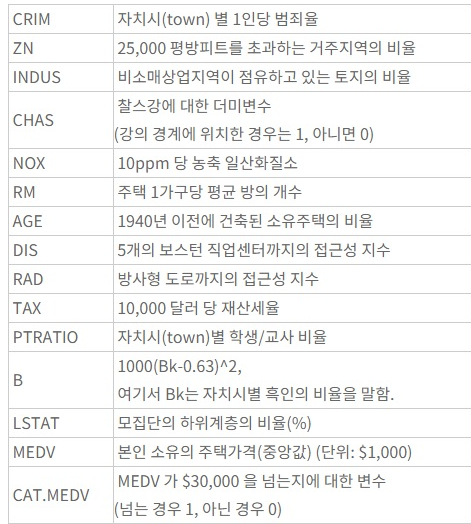

* [01] CRIM 자치시(town) 별 1인당 범죄율
* [02] ZN 25,000 평방피트를 초과하는 거주지역의 비율
* [03] INDUS 비소매상업지역이 점유하고 있는 토지의 비율
* [04] CHAS 찰스강에 대한 더미변수(강의 경계에 위치한 경우는 1, 아니면 0)
* [05] NOX 10ppm 당 농축 일산화질소
* [06] RM 주택 1가구당 평균 방의 개수
* [07] AGE 1940년 이전에 건축된 소유주택의 비율
* [08] DIS 5개의 보스턴 직업센터까지의 접근성 지수
* [09] RAD 방사형 도로까지의 접근성 지수
* [10] TAX 10,000 달러 당 재산세율
* [11] PTRATIO 자치시(town)별 학생/교사 비율
* [12] B 1000(Bk-0.63)^2, 여기서 Bk는 자치시별 흑인의 비율을 말함.
* [13] LSTAT 모집단의 하위계층의 비율(%)
* [14] MEDV 본인 소유의 주택가격(중앙값) (단위: $1,000)

In [4]:
data

,범죄율,"25,000평방피트초과",비소매상업지역비율,찰스강경계,농축 일산화질소,가구당평균방수,1940년이전건축비율,직업센터접근성,도로접근성,재산세율,학생/교사비율,흑인비율,하위계층비율,주택가격
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [5]:
data.head(10)

,범죄율,"25,000평방피트초과",비소매상업지역비율,찰스강경계,농축 일산화질소,가구당평균방수,1940년이전건축비율,직업센터접근성,도로접근성,재산세율,학생/교사비율,흑인비율,하위계층비율,주택가격
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311.0,15.2,386.71,17.10,18.9


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   범죄율           506 non-null    float64
 1   25,000평방피트초과  506 non-null    float64
 2   비소매상업지역비율     506 non-null    float64
 3   찰스강경계         506 non-null    int64  
 4   농축 일산화질소      506 non-null    float64
 5   가구당평균방수       506 non-null    float64
 6   1940년이전건축비율   506 non-null    float64
 7   직업센터접근성       506 non-null    float64
 8   도로접근성         506 non-null    int64  
 9   재산세율          506 non-null    float64
 10  학생/교사비율       506 non-null    float64
 11  흑인비율          506 non-null    float64
 12  하위계층비율        506 non-null    float64
 13  주택가격          506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


결측값은 없고, 데이터 타입도 숫자형으로 되어 있음

In [7]:
data.describe()

,범죄율,"25,000평방피트초과",비소매상업지역비율,찰스강경계,농축 일산화질소,가구당평균방수,1940년이전건축비율,직업센터접근성,도로접근성,재산세율,학생/교사비율,흑인비율,하위계층비율,주택가격
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


이상치 확인하기

In [8]:
data.columns

Index(['범죄율', '25,000평방피트초과', '비소매상업지역비율', '찰스강경계', '농축 일산화질소', '가구당평균방수',
       '1940년이전건축비율', '직업센터접근성', '도로접근성', '재산세율', '학생/교사비율', '흑인비율', '하위계층비율',
       '주택가격'],
      dtype='object')

<Axes: >

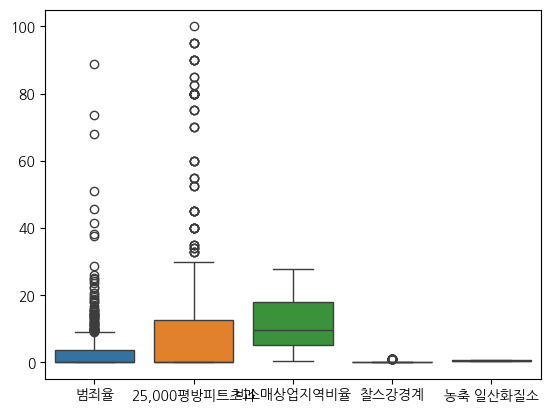

In [9]:
sns.boxplot(data[['범죄율', '25,000평방피트초과', '비소매상업지역비율', '찰스강경계', '농축 일산화질소']])

<Axes: >

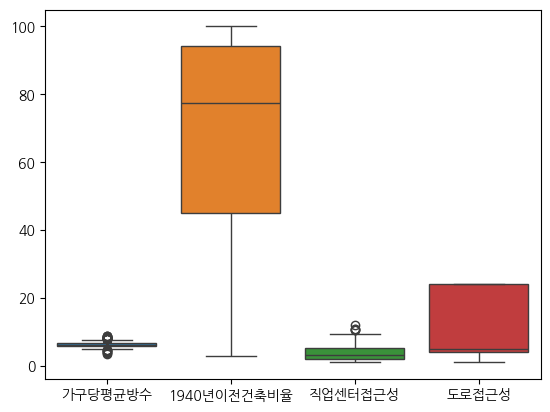

In [10]:
sns.boxplot(data[['가구당평균방수','1940년이전건축비율', '직업센터접근성', '도로접근성']])

<Axes: >

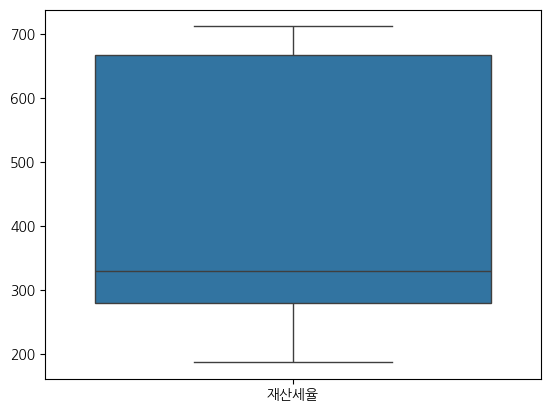

In [11]:
sns.boxplot(data[['재산세율']])

<Axes: >

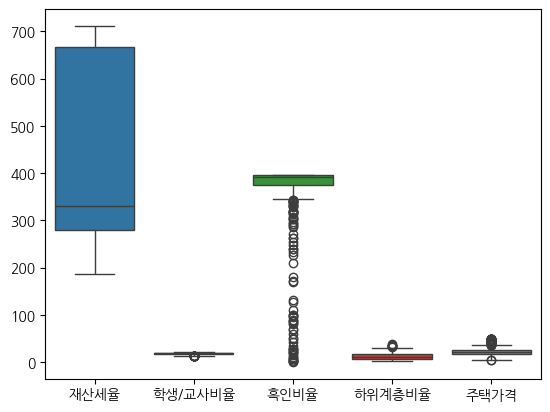

In [12]:
sns.boxplot(data[['재산세율', '학생/교사비율', '흑인비율', '하위계층비율',
       '주택가격']])

<Axes: >

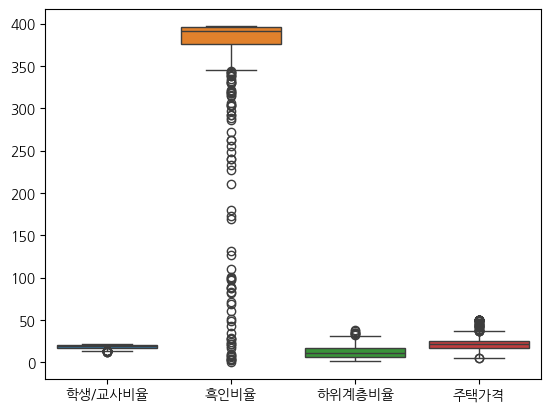

In [13]:
sns.boxplot(data[['학생/교사비율', '흑인비율', '하위계층비율',
       '주택가격']])

<Axes: >

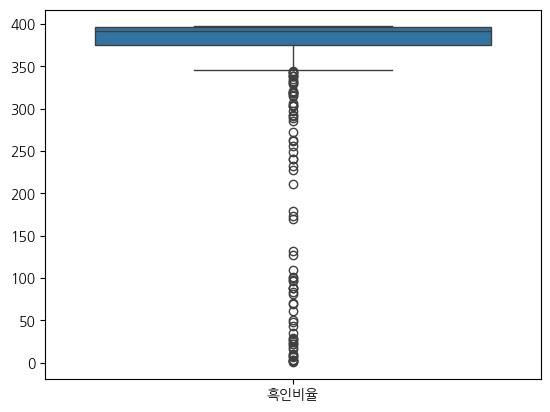

In [14]:
sns.boxplot(data[['흑인비율']])

In [15]:
data.corr(numeric_only=True)

# 숫자로 되어있는 것들만 보여줌

,범죄율,"25,000평방피트초과",비소매상업지역비율,찰스강경계,농축 일산화질소,가구당평균방수,1940년이전건축비율,직업센터접근성,도로접근성,재산세율,학생/교사비율,흑인비율,하위계층비율,주택가격
범죄율,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
"25,000평방피트초과",-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
비소매상업지역비율,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
찰스강경계,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
농축 일산화질소,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
가구당평균방수,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
1940년이전건축비율,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
직업센터접근성,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
도로접근성,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
재산세율,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


<Axes: >

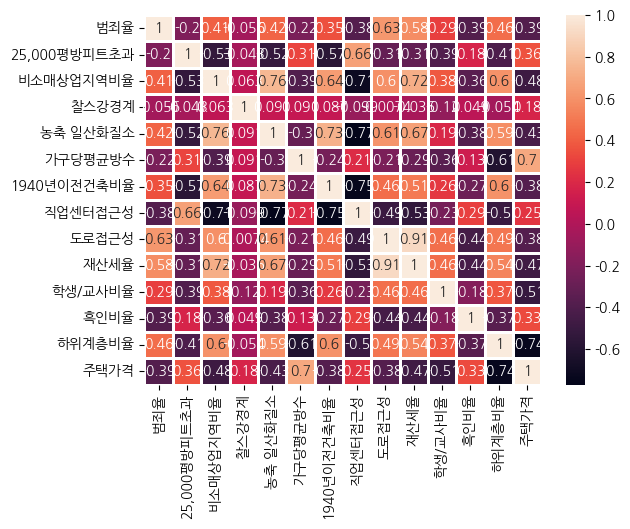

In [16]:
sns.heatmap(data.corr(numeric_only=True), annot=True, linewidth=1)

In [17]:
stats = data.describe()

In [18]:
stats

,범죄율,"25,000평방피트초과",비소매상업지역비율,찰스강경계,농축 일산화질소,가구당평균방수,1940년이전건축비율,직업센터접근성,도로접근성,재산세율,학생/교사비율,흑인비율,하위계층비율,주택가격
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [19]:
stats.loc['75%'] + (1.5 * (stats.loc['75%'] - stats.loc['25%']))

범죄율                9.069639
25,000평방피트초과      31.250000
비소매상업지역비율         37.465000
찰스강경계              0.000000
농축 일산화질소           0.886500
가구당평균방수            7.730500
1940년이전건축비율      167.650000
직업센터접근성            9.820800
도로접근성             54.000000
재산세율            1246.500000
학생/교사비율           24.400000
흑인비율             427.496250
하위계층비율            31.962500
주택가격              36.962500
dtype: float64

In [20]:
pd.DataFrame([stats.loc['75%'] + (1.5 * (stats.loc['75%'] - stats.loc['25%']))], index =["정상최대값"])

,범죄율,"25,000평방피트초과",비소매상업지역비율,찰스강경계,농축 일산화질소,가구당평균방수,1940년이전건축비율,직업센터접근성,도로접근성,재산세율,학생/교사비율,흑인비율,하위계층비율,주택가격
정상최대값,9.069639,31.25,37.465,0.0,0.8865,7.7305,167.65,9.8208,54.0,1246.5,24.4,427.49625,31.9625,36.9625


In [21]:
stats.loc['25%'] - (1.5 * (stats.loc['75%'] - stats.loc['25%']))

범죄율              -5.310511
25,000평방피트초과    -18.750000
비소매상업지역비율       -14.175000
찰스강경계             0.000000
농축 일산화질소          0.186500
가구당평균방수           4.778500
1940년이전건축비율     -28.550000
직업센터접근성          -2.532200
도로접근성           -26.000000
재산세율           -301.500000
학생/교사비율          13.200000
흑인비율            344.106250
하위계층비율           -8.057500
주택가격              5.062500
dtype: float64

In [22]:
cols = data.columns
cols

Index(['범죄율', '25,000평방피트초과', '비소매상업지역비율', '찰스강경계', '농축 일산화질소', '가구당평균방수',
       '1940년이전건축비율', '직업센터접근성', '도로접근성', '재산세율', '학생/교사비율', '흑인비율', '하위계층비율',
       '주택가격'],
      dtype='object')

groupby 반복문에 넣어 다 출력하기


In [23]:
for col in cols :
    print("="*20, col, "="*20)

==================== 범죄율 ====================
==================== 25,000평방피트초과 ====================
==================== 비소매상업지역비율 ====================
==================== 찰스강경계 ====================
==================== 농축 일산화질소 ====================
==================== 가구당평균방수 ====================
==================== 1940년이전건축비율 ====================
==================== 직업센터접근성 ====================
==================== 도로접근성 ====================
==================== 재산세율 ====================
==================== 학생/교사비율 ====================
==================== 흑인비율 ====================
==================== 하위계층비율 ====================
==================== 주택가격 ====================


In [24]:
for col in cols[:-2] :
    print("="*20, col, "="*20)
    display(data.groupby(col)['주택가격'].describe())
    print()
    print()

==================== 범죄율 ====================


,count,mean,std,min,25%,50%,75%,max
범죄율,,,,,,,,
0.00632,1.0,24.0,NaN,24.0,24.0,24.0,24.0,24.0
0.00906,1.0,32.2,NaN,32.2,32.2,32.2,32.2,32.2
0.01096,1.0,22.0,NaN,22.0,22.0,22.0,22.0,22.0
0.01301,1.0,32.7,NaN,32.7,32.7,32.7,32.7,32.7
0.01311,1.0,35.4,NaN,35.4,35.4,35.4,35.4,35.4
...,...,...,...,...,...,...,...,...
45.74610,1.0,7.0,NaN,7.0,7.0,7.0,7.0,7.0
51.13580,1.0,15.0,NaN,15.0,15.0,15.0,15.0,15.0
67.92080,1.0,5.0,NaN,5.0,5.0,5.0,5.0,5.0




==================== 25,000평방피트초과 ====================


,count,mean,std,min,25%,50%,75%,max
"25,000평방피트초과",,,,,,,,
0.0,372.0,20.473387,8.588108,5.0,14.900,19.75,23.100,50.0
12.5,10.0,20.130000,3.539947,15.0,17.775,19.90,21.925,27.1
17.5,1.0,33.000000,NaN,33.0,33.000,33.00,33.000,33.0
18.0,1.0,24.000000,NaN,24.0,24.000,24.00,24.000,24.0
20.0,21.0,35.466667,9.542606,20.7,30.100,35.20,43.500,50.0
21.0,4.0,22.150000,2.477230,19.7,20.300,21.95,23.800,25.0
22.0,10.0,25.320000,7.124418,17.6,21.450,24.45,25.850,42.8
25.0,10.0,22.440000,3.491323,16.0,20.250,23.10,24.575,28.0
28.0,3.0,22.833333,2.200757,20.6,21.750,22.90,23.950,25.0




==================== 비소매상업지역비율 ====================


,count,mean,std,min,25%,50%,75%,max
비소매상업지역비율,,,,,,,,
0.46,1.0,50.000000,NaN,50.0,50.000,50.00,50.000,50.0
0.74,1.0,24.700000,NaN,24.7,24.700,24.70,24.700,24.7
1.21,1.0,50.000000,NaN,50.0,50.000,50.00,50.000,50.0
1.22,1.0,35.400000,NaN,35.4,35.400,35.40,35.400,35.4
1.25,2.0,24.750000,2.616295,22.9,23.825,24.75,25.675,26.6
...,...,...,...,...,...,...,...,...
18.10,132.0,16.403788,8.539745,5.0,11.225,14.40,19.900,50.0
19.58,30.0,23.650000,11.963126,11.8,15.600,19.50,24.175,50.0
21.89,15.0,17.093333,2.560543,13.3,15.000,17.40,18.250,23.0




==================== 찰스강경계 ====================


,count,mean,std,min,25%,50%,75%,max
찰스강경계,,,,,,,,
0,471.0,22.093843,8.831362,5.0,16.6,20.9,24.80,50.0
1,35.0,28.440000,11.816643,13.4,21.1,23.3,33.15,50.0




==================== 농축 일산화질소 ====================


,count,mean,std,min,25%,50%,75%,max
농축 일산화질소,,,,,,,,
0.385,1.0,20.100000,NaN,20.1,20.100,20.10,20.100,20.1
0.389,1.0,22.000000,NaN,22.0,22.000,22.00,22.000,22.0
0.392,2.0,21.400000,0.707107,20.9,21.150,21.40,21.650,21.9
0.394,1.0,44.000000,NaN,44.0,44.000,44.00,44.000,44.0
0.398,2.0,21.450000,2.899138,19.4,20.425,21.45,22.475,23.5
...,...,...,...,...,...,...,...,...
0.713,18.0,15.527778,2.575177,11.7,13.650,14.90,17.375,20.2
0.718,6.0,18.433333,6.750309,8.4,14.825,19.30,21.900,27.5
0.740,13.0,12.646154,3.133320,8.4,10.500,12.60,14.900,18.4




==================== 가구당평균방수 ====================


,count,mean,std,min,25%,50%,75%,max
가구당평균방수,,,,,,,,
3.561,1.0,27.50,NaN,27.5,27.500,27.50,27.500,27.5
3.863,1.0,23.10,NaN,23.1,23.100,23.10,23.100,23.1
4.138,2.0,12.85,1.343503,11.9,12.375,12.85,13.325,13.8
4.368,1.0,8.80,NaN,8.8,8.800,8.80,8.800,8.8
4.519,1.0,7.00,NaN,7.0,7.000,7.00,7.000,7.0
...,...,...,...,...,...,...,...,...
8.375,1.0,50.00,NaN,50.0,50.000,50.00,50.000,50.0
8.398,1.0,48.80,NaN,48.8,48.800,48.80,48.800,48.8
8.704,1.0,50.00,NaN,50.0,50.000,50.00,50.000,50.0




==================== 1940년이전건축비율 ====================


,count,mean,std,min,25%,50%,75%,max
1940년이전건축비율,,,,,,,,
2.9,1.0,26.600000,NaN,26.6,26.600,26.60,26.600,26.6
6.0,1.0,24.100000,NaN,24.1,24.100,24.10,24.100,24.1
6.2,1.0,23.400000,NaN,23.4,23.400,23.40,23.400,23.4
6.5,1.0,24.700000,NaN,24.7,24.700,24.70,24.700,24.7
6.6,2.0,24.750000,0.777817,24.2,24.475,24.75,25.025,25.3
...,...,...,...,...,...,...,...,...
98.8,4.0,14.500000,2.342363,13.1,13.250,13.45,14.700,18.0
98.9,3.0,13.066667,5.519360,8.5,10.000,11.50,15.350,19.2
99.1,1.0,10.900000,NaN,10.9,10.900,10.90,10.900,10.9




==================== 직업센터접근성 ====================


,count,mean,std,min,25%,50%,75%,max
직업센터접근성,,,,,,,,
1.1296,1.0,50.00,NaN,50.0,50.000,50.00,50.000,50.0
1.1370,1.0,13.80,NaN,13.8,13.800,13.80,13.800,13.8
1.1691,1.0,50.00,NaN,50.0,50.000,50.00,50.000,50.0
1.1742,1.0,13.80,NaN,13.8,13.800,13.80,13.800,13.8
1.1781,1.0,11.90,NaN,11.9,11.900,11.90,11.900,11.9
...,...,...,...,...,...,...,...,...
9.2203,2.0,21.40,0.707107,20.9,21.150,21.40,21.650,21.9
9.2229,1.0,33.00,NaN,33.0,33.000,33.00,33.000,33.0
10.5857,2.0,19.40,1.697056,18.2,18.800,19.40,20.000,20.6




==================== 도로접근성 ====================


,count,mean,std,min,25%,50%,75%,max
도로접근성,,,,,,,,
1,20.0,24.365000,8.024454,11.9,20.475,22.20,27.225,50.0
2,24.0,26.833333,7.874376,15.7,21.400,23.85,33.225,43.8
3,38.0,27.928947,8.324692,14.4,21.125,26.50,34.525,50.0
4,110.0,21.387273,6.957883,7.0,17.575,20.45,23.650,50.0
5,115.0,25.706957,9.328401,11.8,19.500,23.00,30.000,50.0
6,26.0,20.976923,2.312801,16.8,18.900,21.20,23.025,24.8
7,17.0,27.105882,6.493215,17.6,24.300,26.20,29.600,42.8
8,24.0,30.358333,9.727724,16.0,23.825,28.25,33.175,50.0
24,132.0,16.403788,8.539745,5.0,11.225,14.40,19.900,50.0




==================== 재산세율 ====================


,count,mean,std,min,25%,50%,75%,max
재산세율,,,,,,,,
187.0,1.0,30.100000,NaN,30.1,30.100,30.1,30.100,30.1
188.0,7.0,19.428571,2.281603,15.7,18.050,20.3,20.950,22.0
193.0,8.0,36.200000,7.177146,26.4,31.775,36.7,38.375,50.0
198.0,1.0,50.000000,NaN,50.0,50.000,50.0,50.000,50.0
216.0,5.0,38.980000,6.207415,33.0,35.100,35.4,45.400,46.0
...,...,...,...,...,...,...,...,...
432.0,9.0,19.688889,1.498703,18.3,18.700,19.2,20.400,22.8
437.0,15.0,17.093333,2.560543,13.3,15.000,17.4,18.250,23.0
469.0,1.0,18.900000,NaN,18.9,18.900,18.9,18.900,18.9




==================== 학생/교사비율 ====================


,count,mean,std,min,25%,50%,75%,max
학생/교사비율,,,,,,,,
12.6,3.0,32.733333,2.205297,30.3,31.800,33.30,33.950,34.6
13.0,12.0,38.025000,8.946927,22.8,30.925,36.25,44.825,50.0
13.6,1.0,50.000000,NaN,50.0,50.000,50.00,50.000,50.0
14.4,1.0,50.000000,NaN,50.0,50.000,50.00,50.000,50.0
14.7,34.0,25.717647,13.102035,11.8,15.600,21.90,26.500,50.0
14.8,3.0,25.433333,3.295957,22.5,23.650,24.80,26.900,29.0
14.9,4.0,40.475000,6.039523,35.1,35.325,40.40,45.550,46.0
15.1,1.0,31.600000,NaN,31.6,31.600,31.60,31.600,31.6
15.2,13.0,26.276923,7.742970,15.0,18.900,27.10,32.000,37.0




==================== 흑인비율 ====================


,count,mean,std,min,25%,50%,75%,max
흑인비율,,,,,,,,
0.32,1.0,13.400000,NaN,13.4,13.4,13.4,13.4,13.4
2.52,1.0,13.400000,NaN,13.4,13.4,13.4,13.4,13.4
2.60,1.0,15.000000,NaN,15.0,15.0,15.0,15.0,15.0
3.50,1.0,13.500000,NaN,13.5,13.5,13.5,13.5,13.5
3.65,1.0,11.700000,NaN,11.7,11.7,11.7,11.7,11.7
...,...,...,...,...,...,...,...,...
396.28,1.0,24.400000,NaN,24.4,24.4,24.4,24.4,24.4
396.30,1.0,19.400000,NaN,19.4,19.4,19.4,19.4,19.4
396.33,1.0,25.000000,NaN,25.0,25.0,25.0,25.0,25.0


<Axes: >

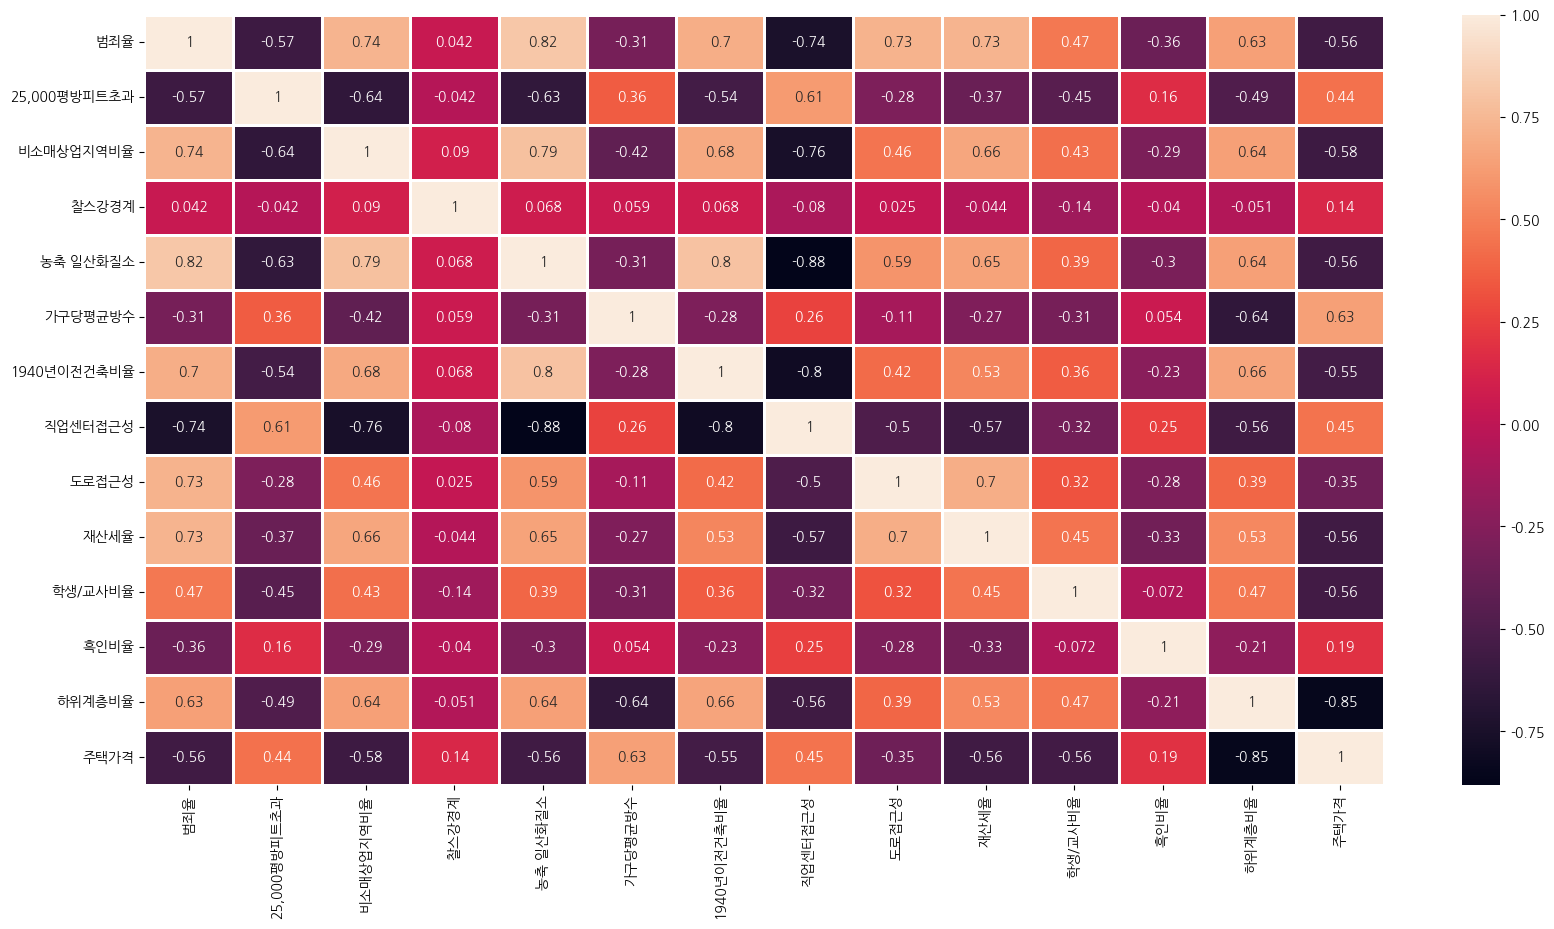

In [25]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(method = 'spearman'), annot=True, linewidth=1)

In [26]:
X = data.drop('주택가격', axis = 1)
y = data['주택가격']

In [27]:
X.head()

# 이상치가 심함. 스케일링 필요함

,범죄율,"25,000평방피트초과",비소매상업지역비율,찰스강경계,농축 일산화질소,가구당평균방수,1940년이전건축비율,직업센터접근성,도로접근성,재산세율,학생/교사비율,흑인비율,하위계층비율
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33


데이터 스케일링 
* standard : 표준 정규분포 - 데이터의 특성 사라짐, 이상값 취약
* min-max : 모든 데이터를 0-1 사이의 숫자로 스케일링, 데이터의 특성 유지, 이상값에 취약함
* robust : 사분위수를 이용해서 스케일링, 이상값이 있는 데이터에 사용

In [28]:
from sklearn.preprocessing import RobustScaler
rs = RobustScaler()
X_scaled = rs.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns = X.columns)
X_scaled

,범죄율,"25,000평방피트초과",비소매상업지역비율,찰스강경계,농축 일산화질소,가구당평균방수,1940년이전건축비율,직업센터접근성,도로접근성,재산세율,학생/교사비율,흑인비율,하위계층비율
0,-0.069593,1.44,-0.571650,0.0,0.000000,0.496612,-0.250765,0.285777,-0.20,-0.087855,-1.339286,0.261902,-0.637681
1,-0.063755,0.00,-0.202943,0.0,-0.394286,0.287940,0.028542,0.569789,-0.15,-0.227390,-0.446429,0.261902,-0.221889
2,-0.063760,0.00,-0.202943,0.0,-0.394286,1.323171,-0.334353,0.569789,-0.15,-0.227390,-0.446429,0.066675,-0.732634
3,-0.062347,0.00,-0.581720,0.0,-0.457143,1.069783,-0.646279,0.924391,-0.10,-0.279070,-0.125000,0.153016,-0.841579
4,-0.052144,0.00,-0.581720,0.0,-0.457143,1.271680,-0.475025,0.924391,-0.10,-0.279070,-0.125000,0.261902,-0.602699
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.053930,0.00,0.173509,0.0,0.200000,0.521003,-0.171254,-0.236007,-0.20,-0.147287,0.696429,0.026382,-0.168916
502,-0.058759,0.00,0.173509,0.0,0.200000,-0.119919,-0.016310,-0.297887,-0.20,-0.147287,0.696429,0.261902,-0.227886
503,-0.054450,0.00,0.173509,0.0,0.200000,1.039973,0.275229,-0.336744,-0.20,-0.147287,0.696429,0.261902,-0.571714
504,-0.040867,0.00,0.173509,0.0,0.200000,0.793360,0.240571,-0.265053,-0.20,-0.147287,0.696429,0.096414,-0.487756


In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=100)

In [31]:
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [32]:
# 상수항 추가

X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

In [33]:
ols = sm.OLS(y_train, X_train).fit()
pred = ols.predict(X_test)
print("mean_absolute_error(MAE): ", mean_absolute_error(y_test, pred))
print("mean_squared_error(MSE): ", mean_squared_error(y_test, pred))
print("root_mean_squared_error(RMSE): ", np.sqrt(mean_squared_error(y_test, pred)))
print("r2_score(r-squred): ", r2_score(y_test,pred))

mean_absolute_error(MAE):  3.248482087616423
mean_squared_error(MSE):  23.616994100563705
root_mean_squared_error(RMSE):  4.859731895955137
r2_score(r-squred):  0.7555033086871297


In [34]:
print(ols.summary())

                            OLS Regression Results                            
Dep. Variable:                   주택가격   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.725
Method:                 Least Squares   F-statistic:                     82.67
Date:                Mon, 02 Sep 2024   Prob (F-statistic):          2.38e-103
Time:                        11:27:37   Log-Likelihood:                -1194.4
No. Observations:                 404   AIC:                             2417.
Df Residuals:                     390   BIC:                             2473.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           22.8954      0.373     61.415   

## 1차 회귀분석 후 유의하지 않은 컬럼 제거 후 재분석

In [35]:
X_scaled2 = X_scaled.drop(["25,000평방피트초과", "비소매상업지역비율", "1940년이전건축비율"], axis=1)

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [38]:
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [39]:
# 상수항 추가

X2_train = sm.add_constant(X2_train)
X2_test = sm.add_constant(X2_test)

In [40]:
ols2 = sm.OLS(y2_train, X2_train).fit()
pred2 = ols2.predict(X2_test)
print("mean_absolute_error(MAE): ", mean_absolute_error(y2_test, pred2))
print("mean_squared_error(MSE): ", mean_squared_error(y2_test, pred2))
print("root_mean_squared_error(RMSE): ", np.sqrt(mean_squared_error(y2_test, pred2)))
print("r2_score(r-squred): ", r2_score(y2_test,pred2))

mean_absolute_error(MAE):  3.18909196588783
mean_squared_error(MSE):  24.29111947497336
root_mean_squared_error(RMSE):  4.928602182665321
r2_score(r-squred):  0.6687594935356341


In [41]:
print(ols2.summary())

                            OLS Regression Results                            
Dep. Variable:                   주택가격   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     90.43
Date:                Mon, 02 Sep 2024   Prob (F-statistic):          6.21e-109
Time:                        11:27:37   Log-Likelihood:                -1194.3
No. Observations:                 404   AIC:                             2417.
Df Residuals:                     390   BIC:                             2473.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           23.1973      0.374     61.961   

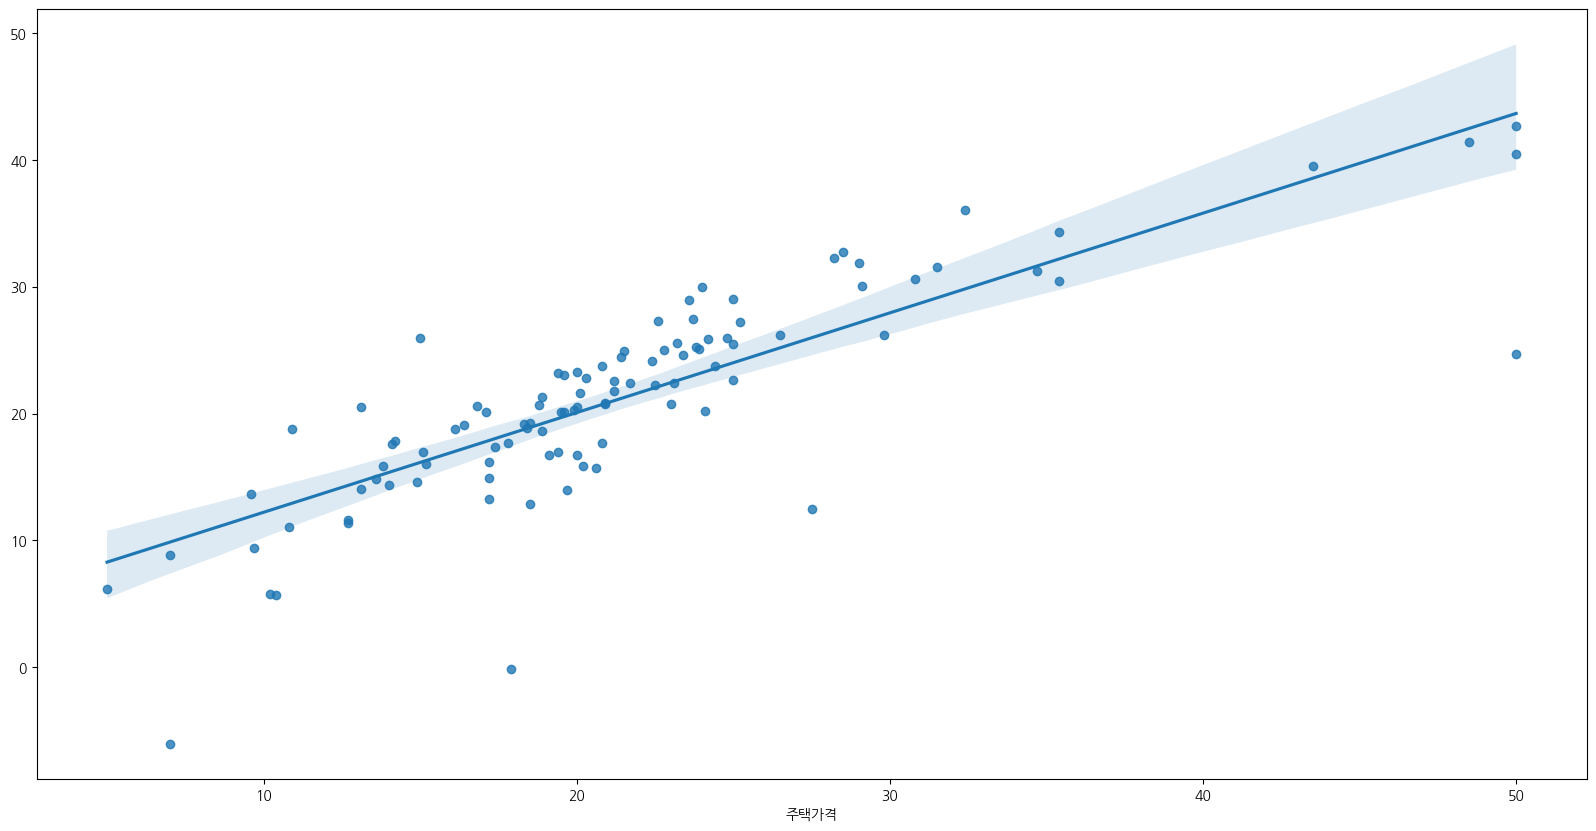

In [42]:
plt.figure(figsize=(20,10))
sns.regplot(x=y2_test, y=pred2, scatter=True)
plt.show()

In [43]:
y2_test

173    23.6
274    32.4
491    13.6
72     22.8
452    16.1
       ... 
412    17.9
436     9.6
411    17.2
86     22.5
75     21.4
Name: 주택가격, Length: 102, dtype: float64

In [44]:
pred2

173    28.996724
274    36.025565
491    14.816944
72     25.031979
452    18.769880
         ...    
412    -0.164237
436    13.684867
411    16.183597
86     22.276220
75     24.479024
Length: 102, dtype: float64

In [45]:
result_df = pd.DataFrame([y2_test, pred2], index=['실제주택가격', '예측가격']).T
result_df

,실제주택가격,예측가격
173,23.6,28.996724
274,32.4,36.025565
491,13.6,14.816944
72,22.8,25.031979
452,16.1,18.769880
...,...,...
412,17.9,-0.164237
436,9.6,13.684867
411,17.2,16.183597
86,22.5,22.276220


In [46]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)
lr_result = pd.DataFrame(lr.coef_, index=lr.feature_names_in_)
display(lr_result)
print("intercept", lr.intercept_)
print()
print("mean_absolute_error(MAE):", mean_absolute_error(y_test, pred))
print("mean_squared_error(MSE):", mean_squared_error(y_test, pred))
print("root_mean_squared_error(RMSE):", np.sqrt(mean_squared_error(y_test, pred)))
print("r2_score(r-squared):", r2_score(y_test, pred))

,0
const,0.000000
범죄율,-0.292958
"25,000평방피트초과",0.600510
비소매상업지역비율,-0.070637
찰스강경계,3.062606
농축 일산화질소,-2.823954
가구당평균방수,2.710269
1940년이전건축비율,-0.417673
직업센터접근성,-4.686137
도로접근성,5.745420


intercept 22.895367638964718

mean_absolute_error(MAE): 3.2484820876164213
mean_squared_error(MSE): 23.616994100563662
root_mean_squared_error(RMSE): 4.859731895955132
r2_score(r-squared): 0.7555033086871301


## 라쏘(L1 제약, 절대값으로 제약, 변수를 분석에서 제외)
* 모델의 과적합을 방지하고 범용성을 높이는 것에 목적
* 라쏘회귀모델은 릿지회귀모델과 다르게 설명력에 기여하지 못하는 독립변수의 회귀계수를 0으로 만드는 방법이다.

In [47]:
from sklearn.linear_model import Lasso

In [48]:
lasso = Lasso(alpha=1.0)
lasso.fit(X_train, y_train)
pred = lasso.predict(X_test)
lasso_result = pd.DataFrame(lasso.coef_, index=lasso.feature_names_in_)
display(lasso_result)
print("intercept", lasso.intercept_)
print()
print("mean_absolute_error(MAE):", mean_absolute_error(y_test, pred))
print("mean_squared_error(MSE):", mean_squared_error(y_test, pred))
print("root_mean_squared_error(RMSE):", np.sqrt(mean_squared_error(y_test, pred)))
print("r2_score(r-squared):", r2_score(y_test, pred))

,0
const,0.000000
범죄율,-0.207180
"25,000평방피트초과",0.146630
비소매상업지역비율,-0.000000
찰스강경계,0.000000
농축 일산화질소,-0.000000
가구당평균방수,3.336152
1940년이전건축비율,-0.000000
직업센터접근성,-0.000000
도로접근성,-0.000000


intercept 22.907604997571607

mean_absolute_error(MAE): 3.861258953130144
mean_squared_error(MSE): 32.760505842270334
root_mean_squared_error(RMSE): 5.723679397229577
r2_score(r-squared): 0.6608444220266003


## 릿지(L2 제약, 가중치의 제곱합을 이용해서 제약, 변수를 0에 가깝게 만들어 무력화) 
* 모델의 설명력에 기여하지 못하는 독립변수의 회귀계수 크기를 0에 근접하도록 축소시킨다. (작아져도 0은 되지 않음) 

In [49]:
from sklearn.linear_model import Ridge

In [51]:
ridge = Ridge(alpha=10.0)
ridge.fit(X2_train, y2_train)
pred = ridge.predict(X2_test)
print('Mean_squared_error(MSE): ', mean_squared_error(y2_test, pred))
print('Root_Mean_squared_error(RMSE): ', np.sqrt(mean_squared_error(y2_test, pred)))
print('R-squared: ', r2_score(y2_test, pred))

Mean_squared_error(MSE):  25.518046192652303
Root_Mean_squared_error(RMSE):  5.051538992490537
R-squared:  0.6520287772844812


In [52]:
ridge = Ridge(alpha=30.0)
ridge.fit(X2_train, y2_train)
pred = ridge.predict(X2_test)
print('Mean_squared_error(MSE): ', mean_squared_error(y2_test, pred))
print('Root_Mean_squared_error(RMSE): ', np.sqrt(mean_squared_error(y2_test, pred)))
print('R-squared: ', r2_score(y2_test, pred))

Mean_squared_error(MSE):  26.479287333777304
Root_Mean_squared_error(RMSE):  5.145802885243206
R-squared:  0.6389210239448843


## Elasticnet (Lasso 와 Ridge를 동시에 사용, L1 규제, L2 규제 조합) 
* 릿지와 라쏘의 결합이다. 즉 L1-norm 과 L2-norm을 모두 이용하여 패널티를 부과하여 회귀모델을 생성한다. 

In [53]:
from sklearn.linear_model import ElasticNet

In [56]:
el_net = ElasticNet(alpha=10.0, l1_ratio=0.01)
el_net.fit(X2_train, y2_train)
pred = el_net.predict(X2_test)
print('Mean_squared_error(MSE): ', mean_squared_error(y2_test, pred))
print('Root_Mean_squared_error(RMSE): ', np.sqrt(mean_squared_error(y2_test, pred)))
print('R-squared: ', r2_score(y2_test, pred))

Mean_squared_error(MSE):  51.68741862428399
Root_Mean_squared_error(RMSE):  7.18939626285017
R-squared:  0.29517588760851865


## Tree 기반의 회귀분석
* DecisionTree
* XGBoost
* LightGBM
* RandomForest

In [57]:
from sklearn.tree import DecisionTreeRegressor

In [58]:
dtr = DecisionTreeRegressor(max_depth=3, random_state=7)
dtr.fit(X2_train, y2_train)
pred = dtr.predict(X2_test)
print('Mean_squared_error(MSE): ', mean_squared_error(y2_test, pred))
print('Root_Mean_squared_error(RMSE): ', np.sqrt(mean_squared_error(y2_test, pred)))
print('R-squared: ', r2_score(y2_test, pred))

Mean_squared_error(MSE):  16.766567150642494
Root_Mean_squared_error(RMSE):  4.094699885295929
R-squared:  0.7713663958398644


In [60]:
for i in range(1, 10):
    dtr = DecisionTreeRegressor(max_depth=i, random_state=7)
    dtr.fit(X2_train, y2_train)
    pred = dtr.predict(X2_test)
    print("max_depth = ", i)
    print('Mean_squared_error(MSE): ', mean_squared_error(y2_test, pred))
    print('Root_Mean_squared_error(RMSE): ', np.sqrt(mean_squared_error(y2_test, pred)))
    print('R-squared: ', r2_score(y2_test, pred))
    print()
    print()

max_depth =  1
Mean_squared_error(MSE):  46.91780325106487
Root_Mean_squared_error(RMSE):  6.8496571630312175
R-squared:  0.3602156982888397


max_depth =  2
Mean_squared_error(MSE):  25.993190895971196
Root_Mean_squared_error(RMSE):  5.098351782289174
R-squared:  0.6455495710736121


max_depth =  3
Mean_squared_error(MSE):  16.766567150642494
Root_Mean_squared_error(RMSE):  4.094699885295929
R-squared:  0.7713663958398644


max_depth =  4
Mean_squared_error(MSE):  10.747180683038664
Root_Mean_squared_error(RMSE):  3.278289292152031
R-squared:  0.8534484350883265


max_depth =  5
Mean_squared_error(MSE):  8.423318349352723
Root_Mean_squared_error(RMSE):  2.902295358738101
R-squared:  0.885137272531848


max_depth =  6
Mean_squared_error(MSE):  20.01901459184784
Root_Mean_squared_error(RMSE):  4.474261345948383
R-squared:  0.727015111874399


max_depth =  7
Mean_squared_error(MSE):  21.762374944551258
Root_Mean_squared_error(RMSE):  4.665016071199676
R-squared:  0.7032421619790954


max

In [63]:
pd.DataFrame([dtr.feature_importances_], columns = dtr.feature_names_in_).T.sort_values(by=0, ascending=False)

,0
가구당평균방수,0.591069
하위계층비율,0.222828
직업센터접근성,0.072055
범죄율,0.039979
학생/교사비율,0.026004
1940년이전건축비율,0.012624
재산세율,0.011808
흑인비율,0.007763
비소매상업지역비율,0.006891
농축 일산화질소,0.005844


선형 회귀는 사용되는 특성(feature)의 갯수에 따라 다음과 같이 구분된다.

- 단순 선형 회귀(simple linear regression) : 특징이 1개

- 다중 선형 회귀(multiple linear regression) : 특징이 여러개

LASSO와 Ridge는 선형 회귀의 단점을 보완해 범용성을 부여하기 위해 만들어진 도구들이다.

In [71]:
from sklearn.tree import plot_tree

[Text(0.5, 0.875, 'x[6] <= 0.993\nsquared_error = 86.873\nsamples = 404\nvalue = 22.797'),
 Text(0.25, 0.625, 'x[13] <= 0.304\nsquared_error = 40.321\nsamples = 337\nvalue = 19.947'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'x[8] <= -0.59\nsquared_error = 25.693\nsamples = 203\nvalue = 23.325'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'x[1] <= 1.855\nsquared_error = 19.005\nsamples = 134\nvalue = 14.829'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'x[6] <= 1.665\nsquared_error = 74.684\nsamples = 67\nvalue = 37.131'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'x[13] <= 0.44\nsquared_error = 38.306\nsamples = 41\nvalue = 32.363'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.375, 'x[11] <= 0.214\nsquared_error = 39.671\nsamples = 26\nvalue = 44.65'),
 Text(0.8125, 0.125, '\n  (...)  \n'),
 Text(0.9375, 0.125, 

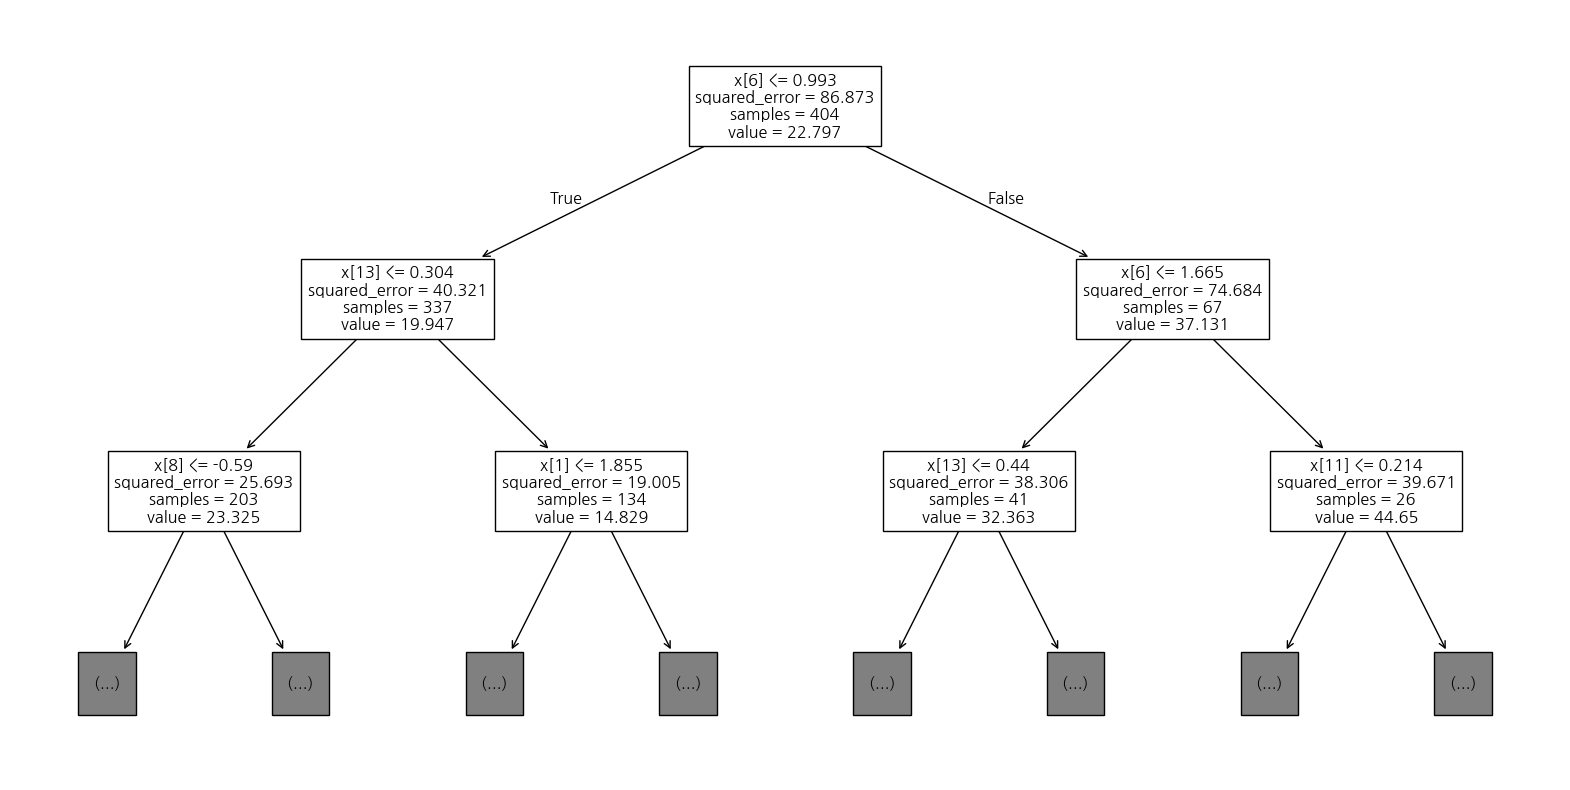

In [72]:
plt.figure(figsize=(20,10))
plot_tree(dtr, max_depth=2)

## XGBoostRegressor 를 사용한 분석

In [64]:
from xgboost import XGBRegressor

In [68]:
xgb = XGBRegressor(max_depth= 5 ,n_estimators=500, n_jobs= -1 ,random_state=7)

xgb.fit(X2_train, y2_train)
pred = xgb.predict(X2_test)
print('Mean_squared_error(MSE): ', mean_squared_error(y2_test, pred))
print('Root_Mean_squared_error(RMSE): ', np.sqrt(mean_squared_error(y2_test, pred)))
print('R-squared: ', r2_score(y2_test, pred))


Mean_squared_error(MSE):  5.872886674621434
Root_Mean_squared_error(RMSE):  2.423403943757919
R-squared:  0.9199156729473226


In [67]:
for i in range(1, 10):
    xgb = XGBRegressor(max_depth= i ,n_estimators=500, n_jobs= -1 ,random_state=7)
    xgb.fit(X2_train, y2_train)
    pred = xgb.predict(X2_test)
    print("max_depth = ", i)
    print('Mean_squared_error(MSE): ', mean_squared_error(y2_test, pred))
    print('Root_Mean_squared_error(RMSE): ', np.sqrt(mean_squared_error(y2_test, pred)))
    print('R-squared: ', r2_score(y2_test, pred))
    print()
    print()

max_depth =  1
Mean_squared_error(MSE):  8.289854133024818
Root_Mean_squared_error(RMSE):  2.8792106788189047
R-squared:  0.8869572279545231


max_depth =  2
Mean_squared_error(MSE):  6.165011306461083
Root_Mean_squared_error(RMSE):  2.4829440804136294
R-squared:  0.9159321796751835


max_depth =  3
Mean_squared_error(MSE):  6.280859581404291
Root_Mean_squared_error(RMSE):  2.5061643165212235
R-squared:  0.9143524401615416


max_depth =  4
Mean_squared_error(MSE):  6.629049274048639
Root_Mean_squared_error(RMSE):  2.5746940156159606
R-squared:  0.9096044280225369


max_depth =  5
Mean_squared_error(MSE):  5.872886674621434
Root_Mean_squared_error(RMSE):  2.423403943757919
R-squared:  0.9199156729473226


max_depth =  6
Mean_squared_error(MSE):  6.909901794656438
Root_Mean_squared_error(RMSE):  2.6286692060159336
R-squared:  0.9057746444152492


max_depth =  7
Mean_squared_error(MSE):  8.112162741243909
Root_Mean_squared_error(RMSE):  2.848185868450988
R-squared:  0.8893802775249025


m

In [70]:
!pip install graphviz

   ---------------------------------------- 0.0/47.1 kB ? eta -:--:--
   ----------------- ---------------------- 20.5/47.1 kB 640.0 kB/s eta 0:00:01
   ---------------------------------------- 47.1/47.1 kB 784.8 kB/s eta 0:00:00


## XGBoost 에서 L1, L2 제약조건 추가하기
* reg_alpha(L1 제약조건) : L1 제약조건을 추가할 때 사용 Lasso
* reg_lambda(L2 제약조건) : L2 제약조건을 추가할 때 사용 Ridge


In [78]:
# reg_alpha(L1 제약조건) : L1 제약조건을 추가할 때 사용 Lasso


xgb = XGBRegressor(max_depth= 5 ,n_estimators=500, reg_alpha=10.0, n_jobs= -1 ,random_state=7)

xgb.fit(X2_train, y2_train)
pred = xgb.predict(X2_test)
print('Mean_squared_error(MSE): ', mean_squared_error(y2_test, pred))
print('Root_Mean_squared_error(RMSE): ', np.sqrt(mean_squared_error(y2_test, pred)))
print('R-squared: ', r2_score(y2_test, pred))


Mean_squared_error(MSE):  7.778529447486406
Root_Mean_squared_error(RMSE):  2.789001514428848
R-squared:  0.8939297945330201


In [79]:
# reg_lambda(L2 제약조건) : L2 제약조건을 추가할 때 사용 Ridge


xgb = XGBRegressor(max_depth= 5 ,n_estimators=500, reg_lambda=10.0, n_jobs= -1 ,random_state=7)

xgb.fit(X2_train, y2_train)
pred = xgb.predict(X2_test)
print('Mean_squared_error(MSE): ', mean_squared_error(y2_test, pred))
print('Root_Mean_squared_error(RMSE): ', np.sqrt(mean_squared_error(y2_test, pred)))
print('R-squared: ', r2_score(y2_test, pred))


Mean_squared_error(MSE):  8.289444159775515
Root_Mean_squared_error(RMSE):  2.879139482514787
R-squared:  0.8869628184645396


In [80]:
# alpha & lambda 동시에 줄 수 있다. 


xgb = XGBRegressor(max_depth= 5 ,n_estimators=500, reg_alpha=10.0, reg_lambda=10.0, n_jobs= -1 ,random_state=7)

xgb.fit(X2_train, y2_train)
pred = xgb.predict(X2_test)
print('Mean_squared_error(MSE): ', mean_squared_error(y2_test, pred))
print('Root_Mean_squared_error(RMSE): ', np.sqrt(mean_squared_error(y2_test, pred)))
print('R-squared: ', r2_score(y2_test, pred))

Mean_squared_error(MSE):  8.74232890476168
Root_Mean_squared_error(RMSE):  2.9567429554767997
R-squared:  0.8807871552780916


* Classifier : 분류 - 입력 데이터를 하나 이상의 클래스(또는 레이블)로 분류하는 데 사용됩니다. 주어진 데이터가 어느 클래스에 속하는지를 예측하는 것이 목표
* Regressor : 회귀 - 력 데이터와 연속적인 수치 값을 예측하는 데 사용됩니다. 주어진 데이터에 대해 숫자 값을 예측하는 것이 목표

* Classifier는 데이터 포인트를 특정 클래스(레이블) 중 하나로 분류합니다.
* Regressor는 데이터 포인트에 대해 연속적인 수치 값을 예측합니다.

## LightGBMRegressor 를 사용한 분석

In [81]:
from lightgbm import LGBMRegressor

In [85]:
lgbmr = LGBMRegressor(n_estimators=500, reg_alpha=10.0, reg_lambda=10.0, n_jobs= -1, random_state=7)

lgbmr.fit(X2_train, y2_train)
pred = lgbmr.predict(X2_test)
print('Mean_squared_error(MSE): ', mean_squared_error(y2_test, pred))
print('Root_Mean_squared_error(RMSE): ', np.sqrt(mean_squared_error(y2_test, pred)))
print('R-squared: ', r2_score(y2_test, pred))


# 오류가 왜 나는지 모르겠음 

LightGBMError: Do not support special JSON characters in feature name.

## RandomForestRegressor 을 사용한 분석

In [86]:
from sklearn.ensemble import RandomForestRegressor

In [87]:
rfr = RandomForestRegressor(n_estimators=500, max_depth=5, random_state=7)

rfr.fit(X2_train, y2_train)
pred = rfr.predict(X2_test)
print('Mean_squared_error(MSE): ', mean_squared_error(y2_test, pred))
print('Root_Mean_squared_error(RMSE): ', np.sqrt(mean_squared_error(y2_test, pred)))
print('R-squared: ', r2_score(y2_test, pred 

Mean_squared_error(MSE):  9.75021019593639
Root_Mean_squared_error(RMSE):  3.1225326573050265
R-squared:  0.8670434037935777
